## Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Read the data

In [2]:
train_data = pd.read_csv(r'C:\Users\HELLO\Favorites\Downloads\Credit Card\train_s3TEQDk.csv')

In [3]:
train_data.shape

(245725, 11)

In [4]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
test_data = pd.read_csv(r'C:\Users\HELLO\Favorites\Downloads\Credit Card\test_mSzZ8RL.csv')

In [6]:
test_data.shape

(105312, 10)

In [7]:
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [8]:
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
test_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [10]:
train_data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [11]:
test_data.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [14]:
#categorical features
categorical = train_data.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train_data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


###### No categorical Feature in train set and 4 Numerical Feature in train set

In [15]:
#categorical features
categorical = test_data.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test_data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 3


###### No categorical Feature in test set and 3 Numerical Feature in test set

In [16]:
print(train_data['Credit_Product'].value_counts())
print('-------------------------------------------')
print(train_data['Credit_Product'].value_counts())

No     144357
Yes     72043
Name: Credit_Product, dtype: int64
-------------------------------------------
No     144357
Yes     72043
Name: Credit_Product, dtype: int64


### Data Cleaning And Exploratry Data Analysis

#### Fill the null value of categorical dataset with mode()

In [17]:
train_data['Credit_Product']= train_data['Credit_Product'].fillna(train_data['Credit_Product'].mode()[0])
test_data['Credit_Product']= test_data['Credit_Product'].fillna(test_data['Credit_Product'].mode()[0])

In [18]:
train_data['Credit_Product'].isnull().sum(),test_data['Credit_Product'].isnull().sum()

(0, 0)

In [19]:
train_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [20]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [21]:
train_data.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


<AxesSubplot:>

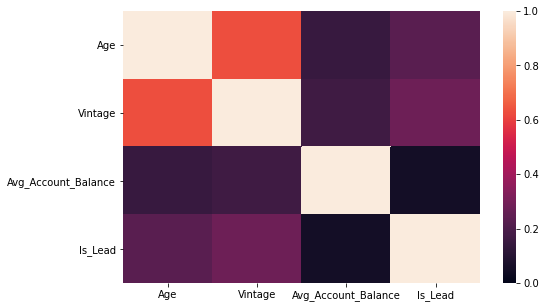

In [22]:
plt.figure(figsize=(8,5))
sns.heatmap(data=train_data.corr(), vmin=0, vmax=1)

In [23]:
test_data.corr()

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.622310,0.136453
Vintage,0.622310,1.000000,0.164756
Avg_Account_Balance,0.136453,0.164756,1.000000


<AxesSubplot:>

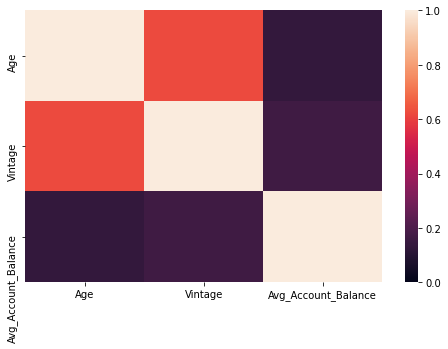

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(data=test_data.corr(), vmin=0, vmax=1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

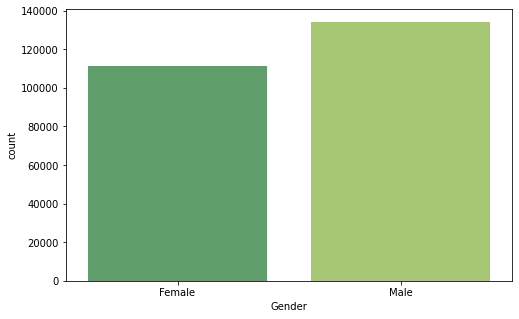

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Gender',data=train_data,palette='summer')

<AxesSubplot:xlabel='Age', ylabel='count'>

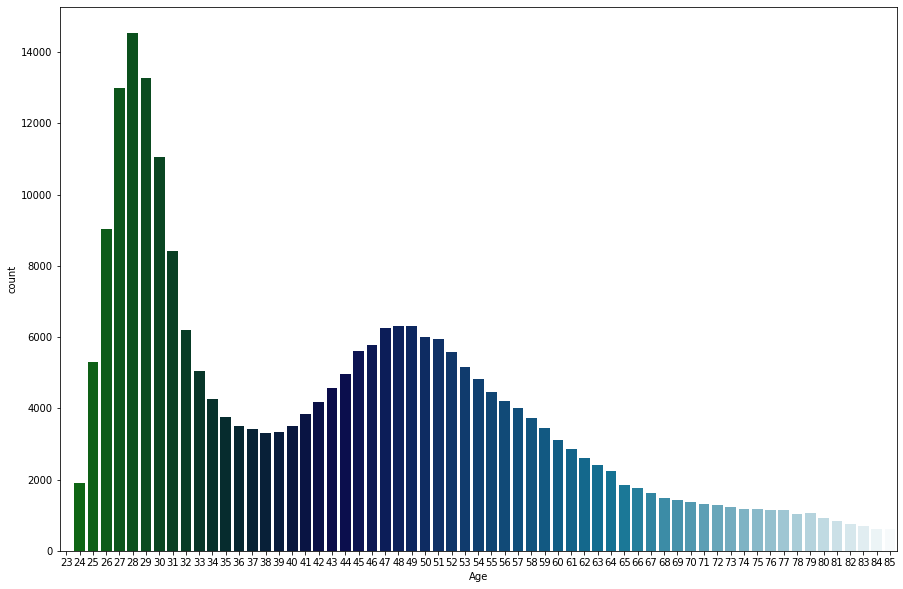

In [26]:
plt.figure(figsize=(15,10))
sns.countplot('Age',data=train_data,palette='ocean')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

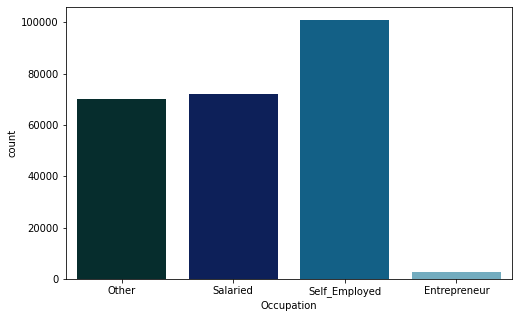

In [27]:
plt.figure(figsize=(8,5))
sns.countplot('Occupation',data=train_data,palette='ocean')

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

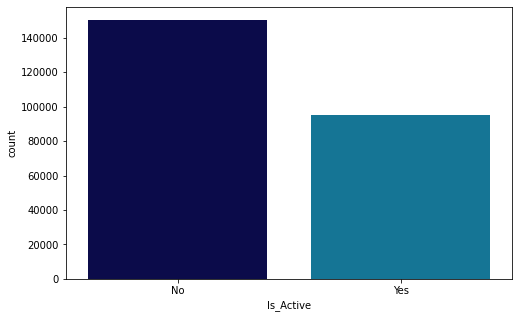

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Is_Active',data=train_data,palette='ocean')

### Label Encoding for balance the data

In [29]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [30]:
# Labelencoding
le = LabelEncoder()
var_mod = train_data.select_dtypes(include='object').columns
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
    
for i in var_mod:
    test_data[i] = le.fit_transform(test_data[i])

In [31]:
train_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

#### Split Data For training and testing

In [32]:
# Seperate Features and Target
X= train_data.drop(columns = ['Is_Lead'], axis=1)
y= train_data['Is_Lead']

In [33]:
# 30% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

### Model Building

In [34]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
coef = pd.Series(LR.coef_,features).sort_values()


<AxesSubplot:>

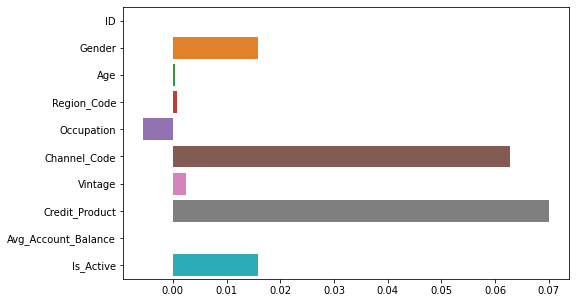

In [35]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

#### This plot shows occupation is most important for credit card lead

In [36]:
MSE= metrics.mean_squared_error(y_test,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.40213673361874225


In [37]:
roc_score = roc_auc_score(y_test, y_pred)
print("roc_auc_score:",roc_score)

roc_auc_score: 0.7208146145464583


### Prediction By different Model.

Here I use Linear Regression, Ridge Regression, Lasso Regression, KNeighbors Regressor and Decision Tree Regressor to predict the output and build model.

In [38]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [39]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

rmse_list = []

In [40]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    MSE= metrics.roc_auc_score(y_test,y_pred)   ### roc_auc_score on all entries to make prediction
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)
   


In [41]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

In [42]:
evaluation

,Model,RMSE
0,Linear Regression,0.849008
1,Ridge Regression,0.849008
2,Lasso Regression,0.818957
3,K Neighbors Regressor,0.715072
4,Decision Tree Regressor,0.781717


#####  As we can clearly see Lasso performs slighlty better than Ridge and Linear regression. KNN Regressor and Decision Tree Regressor do not improve the score so we can select Lasso for making our final predictions

### Final Submission

In [43]:
final_prediction = model.predict(test_data)

In [44]:
submission = pd.read_csv(r'C:\Users\HELLO\Favorites\Downloads\Credit Card\sample_submission_eyYijxG.csv')
model = Lasso()
model.fit(X, y)
submission['Is_Lead'] = final_prediction
#only positive predictions for the target variable
submission['Is_Lead'] = submission['Is_Lead'].apply(lambda x: 0 if x<0 else x)
submission.to_csv(r'C:\Users\HELLO\Favorites\Downloads\Credit Card\Credit_Card_lead_prediction.csv', index=False)

Approach

Here we use Lasso Regression as it perform better than algorithm and provide accurate output which we want to predict